In [1]:
# import the libraries
import numpy as np 
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Dataset
df = pd.read_csv('datasets/Restaurant_Reviews.tsv',sep = '\t', quoting = 3)
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
print(df.shape)
print(df.isna().sum())

(1000, 2)
Review    0
Liked     0
dtype: int64


In [4]:
import re
import nltk
# un comment nltk.download('stopwords') if you're running for the first time
#nltk.download('stopwords')         # Download stopwords from nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
corpus = []

# Iterating through all the reviews
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.lower()
    review  = review.split()
    
    ps = WordNetLemmatizer()
    words = stopwords.words('english')
    words.remove('not')
    words.remove('no')
    words.remove('but')
    words.remove('is')
    review = [ps.lemmatize(word) for word in review if not word in set(words)]
    review = ' '.join(review)
    corpus.append(review)

In [5]:
y = df["Liked"]

In [6]:
Clf_svc = Pipeline([('tfIdf',TfidfVectorizer()),('cl',KNeighborsClassifier(n_neighbors = 8)),])
Clf_svc.fit(corpus,y)

Pipeline(memory=None,
         steps=[('tfIdf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('cl',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,


In [7]:
data1 = pd.read_csv('datasets/Restaurant_reviews_test.tsv',sep = '\t', quoting = 3)
data1.head()

,Review,Liked
0,I really liked this hamburger,1
1,I like this,1
2,Very bad food.,0
3,Foods are very tasty. Behaviour is good. Hygie...,1
4,The breakfast brunch was great.,1


In [8]:
test_data_x = data1['Review']
test_data_y = data1['Liked']

In [9]:
pred_test_data = Clf_svc.predict(test_data_x)

Accuracy :  0.7857142857142857


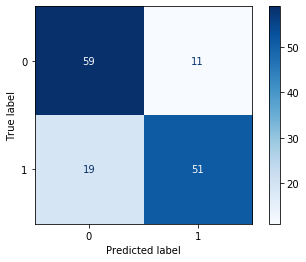

In [10]:
plot_confusion_matrix(Clf_svc, test_data_x, test_data_y, cmap = plt.cm.Blues)
print("Accuracy : ", accuracy_score(test_data_y,pred_test_data))

In [11]:
from sklearn.metrics import classification_report
print(classification_report(test_data_y,pred_test_data))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        70
           1       0.82      0.73      0.77        70

    accuracy                           0.79       140
   macro avg       0.79      0.79      0.79       140
weighted avg       0.79      0.79      0.79       140



### User can manually check inputs

In [12]:
user_review = input('review: ')

result = Clf_svc.predict([user_review])[0]
#Show the result
if(result < 1):
 print('\nNegative review 0')
else:
 print('\npositive review 1')

review: I've found cockroaches in my food

Negative review 0
